# Tree based regression - Basics

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/trees/regression_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data set

To illustrate the concepts we will use a synthetic data set which we generate using the following function

In [2]:
def data(m=50, sigma=0.25):
    """
    Generates a data set of m points by adding some Gaussain noise of variance sigma
    """
    x = np.sort(np.random.rand(m))
    y = -1 + np.sin(2*np.pi*x) + np.random.normal(0, sigma, m)
    return (x, y)

An example

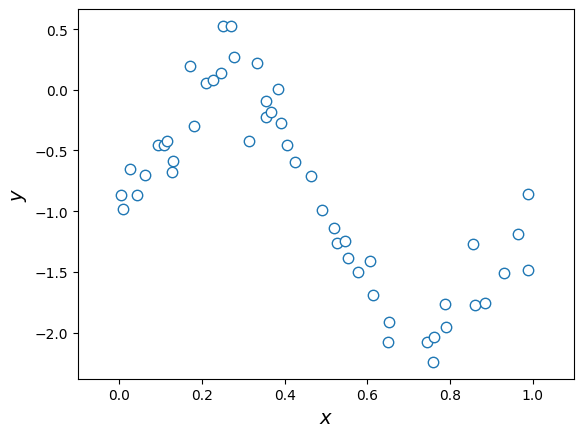

In [3]:
(x, y) = data()
plt.plot(x, y, ".", markersize=15, markerfacecolor='white')
plt.xlim([-0.1, 1.1])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## Regression tree training

Fitting a regression tree model follows the same syntax as other models in scikit-learn. The class [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) from scikit-learn implements tree regression.

In [4]:
X = np.c_[x]
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

A tree model can be visualized as a sequence of decisions with the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function.

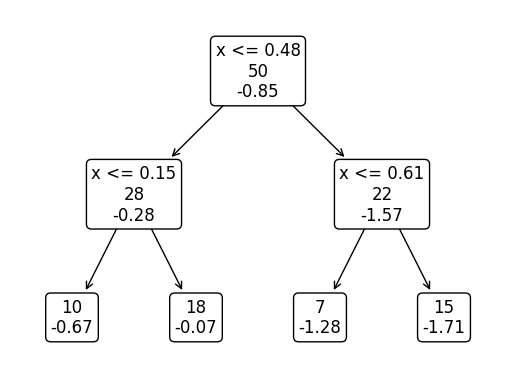

In [5]:
plot_tree(reg, feature_names=['x'], label='none',
          impurity=False, rounded=True, precision=2, fontsize=12) 
plt.show()

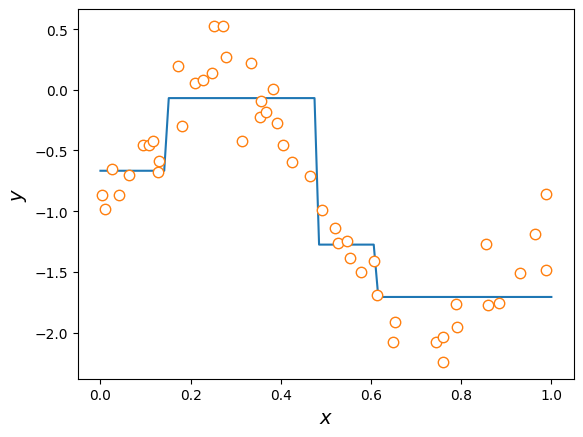

In [6]:
x_fit = np.linspace(0, 1, 100)
y_fit = reg.predict(np.c_[x_fit])
plt.plot(x_fit, y_fit, "-")
plt.plot(x, y, ".", markersize=15, markerfacecolor='white')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## How it works

Trees create a set of regions $R_i$, all distinct, that cover the full data space. In each region $R_i$, the predicted value $y_i$ is the average value of all target values $y$ of the data set within that region.

The splitting used to create the sets $R_i$, is such as to minimize a chosen error measure, for example the squared error SE as it is the default choice for the `DecisionTreeRegressor` class.

For our example, the first separation is the value $s$ such that the squared error of all samples in $R_1$ and $R_2$ is minimized.

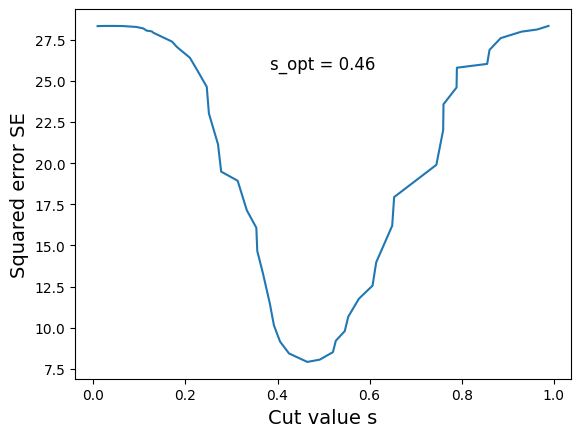

In [7]:
s_range = x[1:len(x)-1]
SE = []
for s in s_range:
    # sets
    R1 = np.where(x <= s)
    R2 = np.where(x > s)
    
    # predicted target values of the sets
    y1 = y[R1].mean()
    y2 = y[R2].mean()
    
    # squared error
    SE1 = ((y[R1]-y1)**2).sum()
    SE2 = ((y[R2]-y2)**2).sum()
    SE = np.append(SE, SE1+SE2)

s_opt = s_range[np.argmin(SE)]
f, ax = plt.subplots()
plt.plot(s_range, SE)
plt.text(0.5, 0.85, 's_opt = ' + f'{s_opt:.2f}', fontsize=12,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)
plt.xlabel('Cut value s', fontsize=14)
plt.ylabel('Squared error SE', fontsize=14)
plt.show()

This results in the following trained tree model:

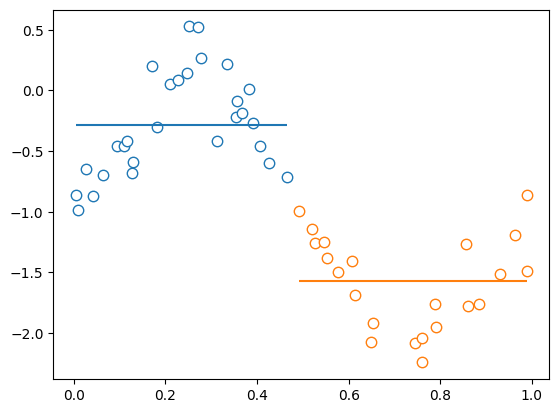

In [8]:
R1 = np.where(x <= s_opt)
R2 = np.where(x > s_opt)
plt.plot(x[R1], y[R1], ".", markersize=15, markerfacecolor='white', color='tab:blue')
plt.hlines(y=y[R1].mean(), xmin=x[R1][0], xmax=x[R1][-1], linestyles='-', color='tab:blue')
plt.plot(x[R2], y[R2], ".", markersize=15, markerfacecolor='white', color='tab:orange')
plt.hlines(y=y[R2].mean(), xmin=x[R2][0], xmax=x[R2][-1], linestyles='-', color='tab:orange')
plt.show()

The two regions $R1$ and $R2$ can be split again in two su-regions following the same idea. The process can be continued until s selected stopping criteria. For example number of sub-levels as was done in our example where the parameter `max_depth` was set to 2.

## More than one feature

For data sets with more than one features, the process is the same. However, the cut value resulting in the smallest error is searched for each feature and afterwards the feature giving the lowest error is selected.

As example we use the [fish](https://github.com/concordia-grad-computing-seminars/data-engineering/tree/main/DataSets/Fishes) data set restricted to the fishes of species smelt.

In [9]:
fishes = pd.read_csv("https://raw.githubusercontent.com/concordia-grad-computing-seminars/data-engineering/main/DataSets/Fishes/Fish.csv")
df = fishes[fishes['Species']=='Smelt']

We use five features (`Length1`, `Length2`, `Length3`, `Height`, `Width`) and one target value (`Weight`).

In [10]:
X = np.c_[df['Length1'], df['Height'], df['Width']]
y = df['Weight']

Training of a regression tree:

In [11]:
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

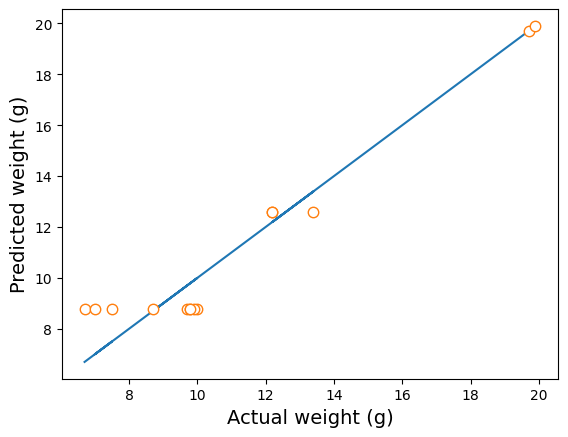

In [12]:
y_pred = reg.predict(X)
plt.plot(y, y, "-")
plt.plot(y, y_pred, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Actual weight (g)', fontsize=14)
plt.ylabel('Predicted weight (g)', fontsize=14)
plt.show()

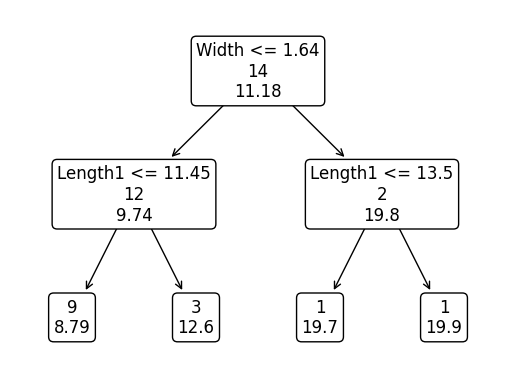

In [13]:
plot_tree(reg, feature_names=['Length1', 'Height', 'Width'], label='none',
          impurity=False, rounded=True, precision=2, fontsize=12) 
plt.show()

## Suggested activities

* Take some time to read the documentation of the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function to understadn the information displayed on the figure.
* Verify that the splits of the regions $R1$ and $R2$ in the first example are indeed the ones calculated by the `DecisionTreeRegressor` class in a similar way as we did for the split which resulted into the two regions $R1$ and $R2$.
* Repeat the examples by increasing the `max_depth` parameter. What do you observe? Can you explain it? 